# Om Sri Sai Ram. Welcome to the final leg of your training program.

This is a competition in which you need to predict whether the customer would buy a credit card or not. Relevant data has been provided to you.

The competition will end at 2 PM sharp. Please start submitting when you have 30 mins in hand.

In [141]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from xgboost import XGBClassifier

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

%matplotlib inline

In [143]:
!pip install xgboost

In [9]:
pwd

'C:\\Users\\saikr'

In [10]:
X_train = pd.read_csv('C:\\Users\\saikr\\Desktop\\Data Science\\SSSO-Medchal-Malkajgiri\\sssso-mdcl-competition\\train.csv')
df = X_train.copy()
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,385,51,25,21,9307,4,0.60,3,0,0,0,0,1,1
1,653,34,9,92,90005,1,2.80,1,0,0,0,0,1,0
2,1470,59,35,59,90005,4,1.20,2,0,0,0,0,1,0
3,1620,45,21,29,90005,1,0.30,3,0,0,0,0,1,0
4,1682,32,8,141,90005,2,4.33,1,0,0,0,0,0,0


In [91]:
X_test = pd.read_csv('C:\\Users\\saikr\\Desktop\\Data Science\\SSSO-Medchal-Malkajgiri\\sssso-mdcl-competition\\test1.csv')
df_test = X_test.copy()
df_test.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,295,35,9,55,94536,1,2.0,1,0,0,0,0,1
1,3359,59,35,40,94536,4,0.4,1,0,0,0,0,0
2,3379,25,0,44,94536,4,0.6,2,0,0,0,0,0
3,3457,46,22,125,94536,2,4.7,3,0,1,0,0,1
4,767,37,12,81,94538,1,2.8,1,0,0,0,0,0


In [13]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print(num_rows, num_cols)

5000 14


In [92]:
num_test_rows = df_test.shape[0]
num_test_cols = df_test.shape[1]
print(num_test_rows, num_test_cols)

1500 13


In [94]:
# Data Cleaning
print(df.isnull().values.any())
print(df_test.isnull().values.any())

False
False


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [95]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1500 non-null   int64  
 1   Age                 1500 non-null   int64  
 2   Experience          1500 non-null   int64  
 3   Income              1500 non-null   int64  
 4   ZIP Code            1500 non-null   int64  
 5   Family              1500 non-null   int64  
 6   CCAvg               1500 non-null   float64
 7   Education           1500 non-null   int64  
 8   Mortgage            1500 non-null   int64  
 9   Personal Loan       1500 non-null   int64  
 10  Securities Account  1500 non-null   int64  
 11  CD Account          1500 non-null   int64  
 12  Online              1500 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 152.5 KB


In [22]:
print(df['CreditCard'].value_counts())

0    3530
1    1470
Name: CreditCard, dtype: int64


In [24]:
dummies_df = pd.get_dummies(df)

In [25]:
dummies_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,385,51,25,21,9307,4,0.60,3,0,0,0,0,1,1
1,653,34,9,92,90005,1,2.80,1,0,0,0,0,1,0
2,1470,59,35,59,90005,4,1.20,2,0,0,0,0,1,0
3,1620,45,21,29,90005,1,0.30,3,0,0,0,0,1,0
4,1682,32,8,141,90005,2,4.33,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,673,51,27,23,96651,1,0.20,1,0,0,0,0,1,0
4996,1427,37,11,60,96651,3,0.50,3,0,0,0,0,1,0
4997,1654,26,1,24,96651,2,0.90,3,123,0,0,0,0,1
4998,2732,29,5,28,96651,1,0.20,3,0,0,0,0,1,0


# Case1  : Splitting the data into train and test data from the train.csv file provided

In [150]:
# from sklearn.model_selection import train_test_split
X_train = dummies_df.drop('CreditCard',axis=1)
y_train = dummies_df['CreditCard']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [151]:
X_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,385,51,25,21,9307,4,0.60,3,0,0,0,0,1
1,653,34,9,92,90005,1,2.80,1,0,0,0,0,1
2,1470,59,35,59,90005,4,1.20,2,0,0,0,0,1
3,1620,45,21,29,90005,1,0.30,3,0,0,0,0,1
4,1682,32,8,141,90005,2,4.33,1,0,0,0,0,0


# Linear Model (Stochastic Gradient Descent Classifier)

In [152]:
# Linear model
model = linear_model.SGDClassifier()
model.fit(X_train, y_train)

SGDClassifier()

In [156]:
y_pred = model.predict(df_test)
print(y_pred)
print(np.count_nonzero(y_pred))

[1 1 1 ... 1 1 1]
1500


In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6973333333333334

In [63]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5

# Decision Tree Classifier

In [32]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)

In [33]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1054
           1       0.37      0.37      0.37       446

    accuracy                           0.63      1500
   macro avg       0.55      0.55      0.55      1500
weighted avg       0.63      0.63      0.63      1500



In [37]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[776 278]
 [282 164]]
Accuracy of prediction: 0.627


In [64]:
accuracy_score(y_test, predictions)

0.5786666666666667

In [65]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5

# Training the Random Forest model

In [38]:
rfc = RandomForestClassifier(n_estimators=600)

In [39]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [40]:
rfc_pred = rfc.predict(X_test)

In [66]:
cr = classification_report(y_test,rfc_pred)

In [67]:
print(cr)

              precision    recall  f1-score   support

           0       0.70      0.94      0.80      1046
           1       0.36      0.08      0.13       454

    accuracy                           0.68      1500
   macro avg       0.53      0.51      0.47      1500
weighted avg       0.60      0.68      0.60      1500



In [68]:
cm = confusion_matrix(y_test,rfc_pred)
print(cm)

[[981  65]
 [417  37]]


In [69]:
accuracy_score(y_test, rfc_pred)

0.6786666666666666

In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5

# XGBoost Classifier 

In [72]:
model = XGBClassifier(learning_rate = 0.1, n_estimators=150, min_child_weight=3,  max_depth=13)
model.fit(X_train, y_train)

C:\Users\saikr\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=13,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
y_pred_rfc = model.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred_rfc)

0.7133333333333334

In [76]:
roc_auc_score(y_test, y_pred_rfc)

0.5800363878336603

# BAGGING classifier

In [99]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7166666666666667

# Adaboost Classifier

In [101]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7526666666666667

# Gradient Boosting Classifier

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.758

# Light GBM Classifier

In [110]:
!pip install lightgbm
!pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=fe4f7e8f023baca8746b998b463728172bd89d004376ef8e4a104e9bfc01caaa
  Stored in directory: c:\users\saikr\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [108]:
import lightgbm as lgb
train_data=lgb.Dataset(X_train,label=y_train)
#define parameters
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100) 
y_pred=model.predict(X_test)
for i in range(0,185):
    if y_pred[i]>=0.5: 
        y_pred[i]=1
    else: 
        y_pred[i]=0

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1110
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 13
[LightGBM] [Info] Start training from score 0.298571


# Cat Boost

In [111]:
from catboost import CatBoostClassifier
model=CatBoostClassifier()
categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(X_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(X_test, y_test))
model.score(X_test,y_test)

Learning rate set to 0.043181
0:	learn: 0.6818762	test: 0.6812742	best: 0.6812742 (0)	total: 264ms	remaining: 4m 24s
1:	learn: 0.6721312	test: 0.6711900	best: 0.6711900 (1)	total: 396ms	remaining: 3m 17s
2:	learn: 0.6634355	test: 0.6619260	best: 0.6619260 (2)	total: 451ms	remaining: 2m 30s
3:	learn: 0.6554617	test: 0.6533738	best: 0.6533738 (3)	total: 528ms	remaining: 2m 11s
4:	learn: 0.6469250	test: 0.6448032	best: 0.6448032 (4)	total: 600ms	remaining: 1m 59s
5:	learn: 0.6404548	test: 0.6377856	best: 0.6377856 (5)	total: 617ms	remaining: 1m 42s
6:	learn: 0.6317956	test: 0.6291585	best: 0.6291585 (6)	total: 680ms	remaining: 1m 36s
7:	learn: 0.6255424	test: 0.6229330	best: 0.6229330 (7)	total: 749ms	remaining: 1m 32s
8:	learn: 0.6203549	test: 0.6175306	best: 0.6175306 (8)	total: 803ms	remaining: 1m 28s
9:	learn: 0.6146605	test: 0.6120707	best: 0.6120707 (9)	total: 882ms	remaining: 1m 27s
10:	learn: 0.6103245	test: 0.6075487	best: 0.6075487 (10)	total: 954ms	remaining: 1m 25s
11:	learn: 

0.754

# Case2 : Using the test dataset provided for testing the accuracy

In [162]:
X_test = pd.read_csv('C:\\Users\\saikr\\Desktop\\Data Science\\SSSO-Medchal-Malkajgiri\\sssso-mdcl-competition\\test.csv')
df_test = X_test.copy()
df_test.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,295,35,9,55,94536,1,2.0,1,0,0,0,0,1
1,3359,59,35,40,94536,4,0.4,1,0,0,0,0,0
2,3379,25,0,44,94536,4,0.6,2,0,0,0,0,0
3,3457,46,22,125,94536,2,4.7,3,0,1,0,0,1
4,767,37,12,81,94538,1,2.8,1,0,0,0,0,0


In [163]:
num_test_rows = df_test.shape[0]
num_test_cols = df_test.shape[1]
print(num_test_rows, num_test_cols)

1500 13


In [164]:
# Searching the data for null values
df_test.isnull().values.any()

False

In [165]:
pwd

'C:\\Users\\saikr'

In [166]:
# Linear model - SGD Classifier
sgd_model = linear_model.SGDClassifier()
sgd_model.fit(X_train, y_train)
sgd_predict = sgd_model.predict(df_test)

In [167]:
gbc_model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
gbc_model.fit(X_train, y_train)
gbc_predict = gbc_model.predict(df_test)

df_test['CreditCard'] = gbc_predict

df_test.to_csv('C:\\Users\\saikr\\Desktop\\Data Science\\SSSO-Medchal-Malkajgiri\\sssso-mdcl-competition\\submission.csv', index = False)

np.count_nonzero(sgd_predict)
np.count_nonzero(gbc_predict)

79

In [118]:
predictions = dtree.predict(X_test)
print(accuracy_score(y_test,predictions))

0.5786666666666667


In [119]:
model=CatBoostClassifier()
categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(X_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(X_test, y_test))
model.score(X_test,y_test)

Learning rate set to 0.043181
0:	learn: 0.6818762	test: 0.6860550	best: 0.6860550 (0)	total: 35.8ms	remaining: 35.7s
1:	learn: 0.6721312	test: 0.6794114	best: 0.6794114 (1)	total: 76.5ms	remaining: 38.2s
2:	learn: 0.6634355	test: 0.6734763	best: 0.6734763 (2)	total: 117ms	remaining: 39s
3:	learn: 0.6554617	test: 0.6681421	best: 0.6681421 (3)	total: 157ms	remaining: 39.1s
4:	learn: 0.6469250	test: 0.6637063	best: 0.6637063 (4)	total: 198ms	remaining: 39.4s
5:	learn: 0.6404548	test: 0.6595538	best: 0.6595538 (5)	total: 215ms	remaining: 35.7s
6:	learn: 0.6317956	test: 0.6558876	best: 0.6558876 (6)	total: 274ms	remaining: 38.9s
7:	learn: 0.6255424	test: 0.6527893	best: 0.6527893 (7)	total: 311ms	remaining: 38.6s
8:	learn: 0.6203549	test: 0.6502128	best: 0.6502128 (8)	total: 353ms	remaining: 38.8s
9:	learn: 0.6146605	test: 0.6485700	best: 0.6485700 (9)	total: 399ms	remaining: 39.5s
10:	learn: 0.6103245	test: 0.6464661	best: 0.6464661 (10)	total: 466ms	remaining: 41.9s
11:	learn: 0.6058457	t

0.6833333333333333

# Running a loop with increasing number of trees in the random forest and checking accuracy of confusion matrix

In [44]:
# Criterion1  : 'gini' 
# Criterion2 : 'entropy'

nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

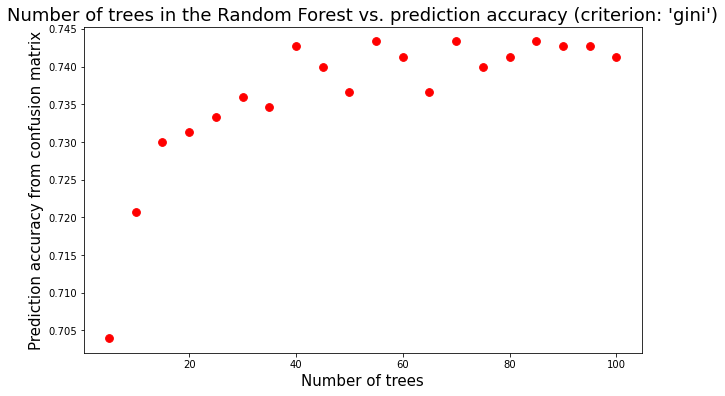

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [46]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='entropy')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

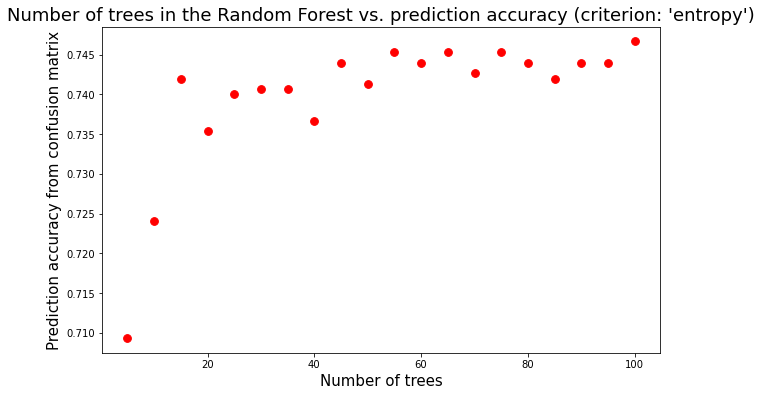

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [48]:
# Fixing max tree depth

nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

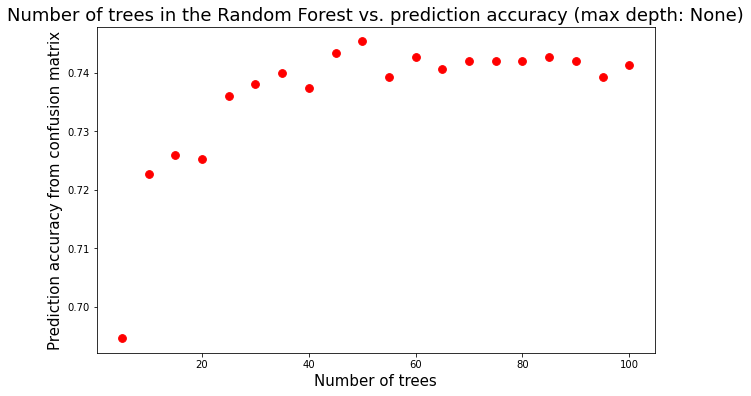

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: None)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [50]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=5,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

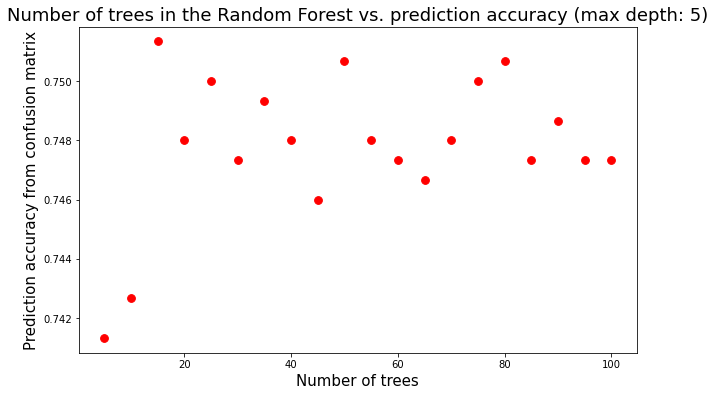

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: 5)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [53]:
# Minimum sample split criteria

nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=2,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

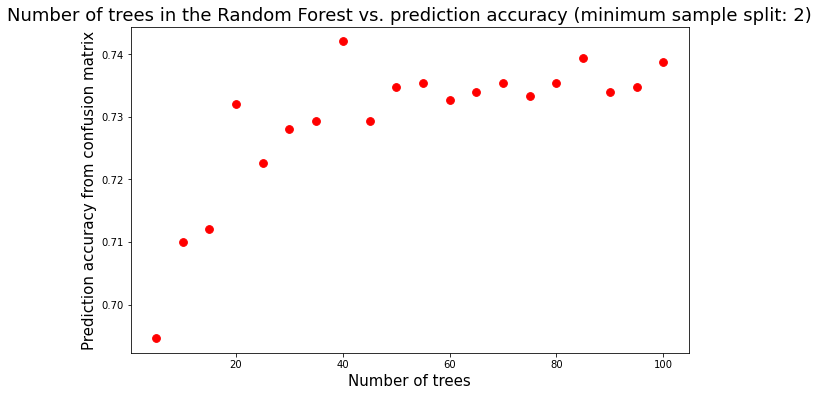

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 2)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [55]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=20,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

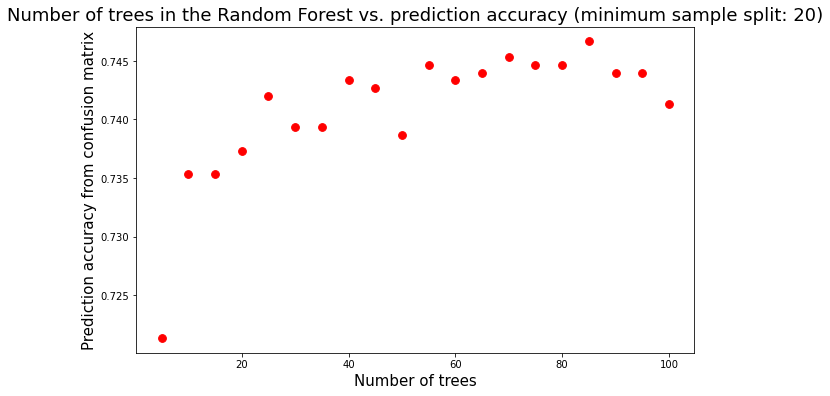

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 20)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)